In [1]:
%load_ext autoreload
%autoreload 2 

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

import pandas as pd
from sklearn.externals import joblib
from keras.models import load_model

from twitter_sentiment.model import TweetClassifier
from unboxer.attention_vis import AttentionVisualizer

PREP_FILEPATH = '/mnt/ml-team/homes/jakub.czakon/.unblackboxing_webinar_data/models/tweet_preprocessor.pkl'
ATTENTION_MODEL_FILEPATH = '/mnt/ml-team/homes/jakub.czakon/.unblackboxing_webinar_data/models/tweetnetAttention36.h5'

Using TensorFlow backend.


In [2]:
tweet_preprocessor = joblib.load(PREP_FILEPATH)
tweet_classifier_attention = load_model(ATTENTION_MODEL_FILEPATH)

/home/jakub.czakon/.env/dl_py3/lib/python3.5/site-packages/keras/engine/topology.py:1210: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [3]:
tweet_attention_vis = AttentionVisualizer(tweet_preprocessor, 
                                           tweet_classifier_attention, 36)

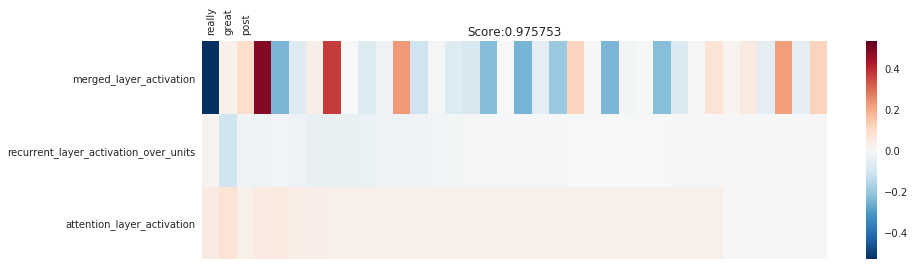

In [4]:
tweet = 'really great post' 
result = tweet_attention_vis.vis_activation([tweet])

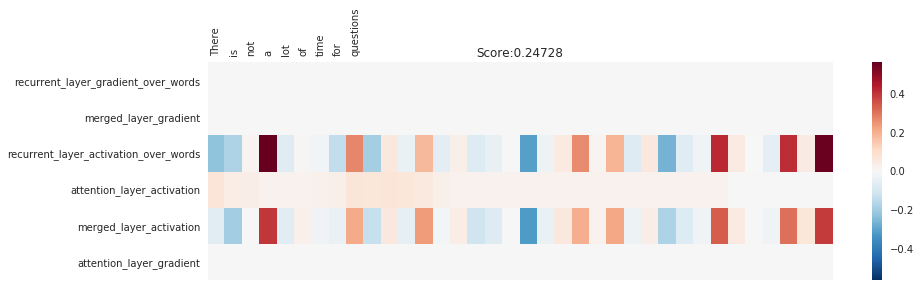

In [4]:
tweet_attention_vis.type_and_vis();